In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#read the file of first measurement (performed at 2016-09-30) as a data frame:
df = pd.read_csv('sobar-72.csv')

In [4]:
#show the head of the data frame:
df.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [5]:
#show the list of clolumn names of the data frame:
df.columns

Index(['behavior_sexualRisk', 'behavior_eating', 'behavior_personalHygine',
       'intention_aggregation', 'intention_commitment', 'attitude_consistency',
       'attitude_spontaneity', 'norm_significantPerson', 'norm_fulfillment',
       'perception_vulnerability', 'perception_severity',
       'motivation_strength', 'motivation_willingness',
       'socialSupport_emotionality', 'socialSupport_appreciation',
       'socialSupport_instrumental', 'empowerment_knowledge',
       'empowerment_abilities', 'empowerment_desires', 'ca_cervix'],
      dtype='object')

In [6]:
#make a correlated data frame:
#finding pairwise correlation of all columns in the dataframe.
#Any na values are automatically excluded. For any non-numeric data type columns
#in the dataframe it is ignored.
df_corr = df.corr()

In [7]:
#show the head of the data frame (here correlated data frame):
df_corr.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
behavior_sexualRisk,1.000000,-0.165857,0.003912,-0.005779,0.126616,-0.067541,-0.057420,0.057869,0.158799,0.175791,0.067469,-0.041937,0.309357,0.076449,0.102404,0.104478,0.173936,0.206222,0.285072,-0.311138
behavior_eating,-0.165857,1.000000,0.224623,0.116634,0.116075,0.124197,0.307610,0.038376,-0.048262,-0.000407,-0.077467,-0.141732,-0.077380,-0.076671,-0.013382,0.061665,0.060272,-0.015987,0.052121,0.200358
behavior_personalHygine,0.003912,0.224623,1.000000,0.441812,0.009613,0.152173,-0.118433,0.237063,0.252655,0.139975,0.252095,0.386605,0.432542,0.388862,0.354117,0.097603,0.444124,0.391971,0.199207,-0.372740
intention_aggregation,-0.005779,0.116634,0.441812,1.000000,0.265216,-0.039642,-0.175529,0.116701,0.059118,-0.044997,0.061595,0.337717,0.277540,0.188725,0.080188,0.035303,0.267148,0.106073,0.127319,-0.291717
intention_commitment,0.126616,0.116075,0.009613,0.265216,1.000000,-0.005897,0.229804,0.012453,-0.031610,-0.012274,-0.022190,0.180654,0.104314,0.000796,0.016037,0.015975,0.145965,0.056755,0.176077,-0.237040


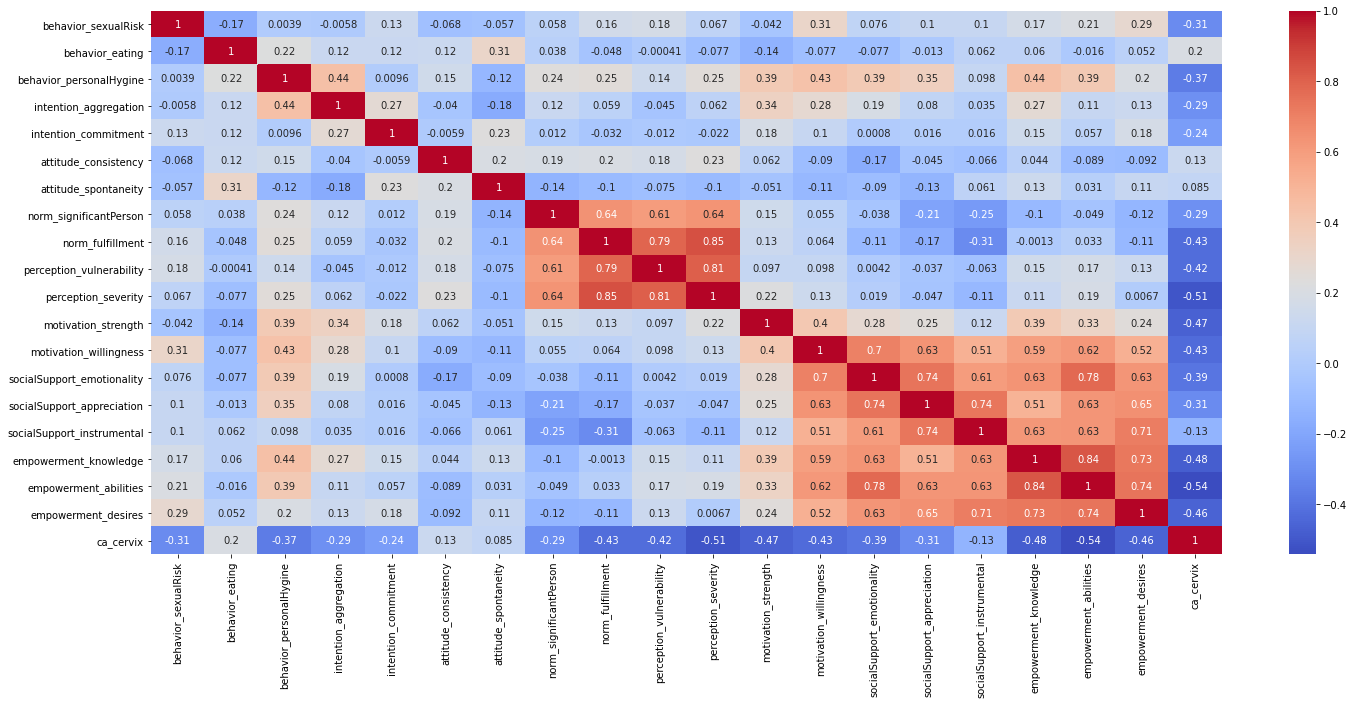

In [8]:
#define the size of the plot:
plt.figure(figsize=(24,10))
#plot heatmap plot of the correlated data frame:
sns.heatmap(df_corr,cmap='coolwarm',annot=True)

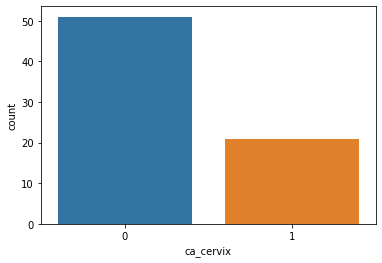

In [5]:
#make count plot of the object:
sns.countplot(x='ca_cervix',data=df)

In [10]:
#show the list of total null values in each column:
df.isnull().sum()

behavior_sexualRisk           0
behavior_eating               0
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
ca_cervix                     0
dtype: int64

Linear regression for binary classification task (type of cervical test, cancereus or non-cancereus)

In [6]:
#import libraries from scikit-learn to split data into train and test sets:
from sklearn.model_selection import train_test_split

In [7]:
#define object and featues in the data frame:
X = df.drop('ca_cervix',axis=1).values
y = df['ca_cervix'].values

In [8]:
#split data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#import the model logistic regression from scikit-learn linrary to perform 
#data training and prediction:
from sklearn.linear_model import LogisticRegression

In [10]:
#define the model (estimator)
logmodel = LogisticRegression(max_iter=170)

In [11]:
#fit model to the training set of data:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=170)

In [12]:
#use the model to predict the object value for the test set of data:
predictions = logmodel.predict(X_test)

In [23]:
#use the model to predict the object value for the all set of data:
predictions_all = logmodel.predict(X)

In [18]:
#import required metrics from scikit-learn to produce the classification report:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.88      1.00      0.93         7

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
print('confusion matrix:',confusion_matrix(y_test,predictions))

confusion matrix: [[7 1]
 [0 7]]


In [24]:
print('confusion matrix:',confusion_matrix(y,predictions_all))

confusion matrix: [[50  1]
 [ 0 21]]
